In [1]:
## Networks Project Gender wise Communities

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
import statsmodels.formula.api as smf
import community as cmnt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
juneDf = pd.read_csv('2014-06 - Citi Bike trip data.csv')
stationsDf = pd.read_csv('citibike-locations.csv')

In [3]:
print juneDf.info()
print juneDf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936880 entries, 0 to 936879
Data columns (total 15 columns):
tripduration               936880 non-null int64
starttime                  936880 non-null object
stoptime                   936880 non-null object
start station id           936880 non-null int64
start station name         936880 non-null object
start station latitude     936880 non-null float64
start station longitude    936880 non-null float64
end station id             936880 non-null int64
end station name           936880 non-null object
end station latitude       936880 non-null float64
end station longitude      936880 non-null float64
bikeid                     936880 non-null int64
usertype                   936880 non-null object
birth year                 936880 non-null object
gender                     936880 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 114.4+ MB
None
   tripduration            starttime             stoptime  start statio

In [4]:
juneMale = juneDf[juneDf.gender == 1]

In [5]:
juneMale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620949 entries, 0 to 936879
Data columns (total 15 columns):
tripduration               620949 non-null int64
starttime                  620949 non-null object
stoptime                   620949 non-null object
start station id           620949 non-null int64
start station name         620949 non-null object
start station latitude     620949 non-null float64
start station longitude    620949 non-null float64
end station id             620949 non-null int64
end station name           620949 non-null object
end station latitude       620949 non-null float64
end station longitude      620949 non-null float64
bikeid                     620949 non-null int64
usertype                   620949 non-null object
birth year                 620949 non-null object
gender                     620949 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 75.8+ MB


In [6]:
juneFemale = juneDf[juneDf.gender == 2]

In [7]:
juneFemale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197579 entries, 10 to 936876
Data columns (total 15 columns):
tripduration               197579 non-null int64
starttime                  197579 non-null object
stoptime                   197579 non-null object
start station id           197579 non-null int64
start station name         197579 non-null object
start station latitude     197579 non-null float64
start station longitude    197579 non-null float64
end station id             197579 non-null int64
end station name           197579 non-null object
end station latitude       197579 non-null float64
end station longitude      197579 non-null float64
bikeid                     197579 non-null int64
usertype                   197579 non-null object
birth year                 197579 non-null object
gender                     197579 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ MB


In [8]:
# Counting rides between each pair of the stations
male_grouped = juneMale.groupby(['start station id', 'end station id']).count()
female_grouped = juneFemale.groupby(['start station id', 'end station id']).count()

In [9]:
# Resetting the indeces
male_grouped = male_grouped.reset_index()
female_grouped = female_grouped.reset_index()

In [10]:
# Selecting 3 columns, representing node A, node B and weight of the edges
male_grouped = male_grouped[['start station id', 'end station id', 'tripduration']]
female_grouped = female_grouped[['start station id', 'end station id', 'tripduration']]
male_grouped.columns = ['start', 'stop', 'weight']
female_grouped.columns = ['start', 'stop', 'weight']

In [11]:
# Taking a look at the resulting dataframes
print male_grouped.head()
print female_grouped.head()

   start  stop  weight
0     72    72      45
1     72    79       7
2     72    82       2
3     72    83       1
4     72   116       2
   start  stop  weight
0     72    72      23
1     72    79       1
2     72   116       2
3     72   127       1
4     72   128       2


In [31]:
stations_name = juneDf.groupby(['start station id', 'start station name']).count()
stations_name = stations_name.reset_index()
stations_name = stations_name[['start station id', 'start station name', 'tripduration']]
stations_name.columns = ['id', 'name', 'count']
stations_name.head()
# print len(stations_name)
# print stations_name

,id,name,count
0,72,W 52 St & 11 Ave,3088
1,79,Franklin St & W Broadway,2357
2,82,St James Pl & Pearl St,1191
3,83,Atlantic Ave & Fort Greene Pl,1270
4,116,W 17 St & 8 Ave,5168


In [12]:
# Creating the graphs
maleGraph = nx.DiGraph()
femaleGraph = nx.DiGraph()

# Adding edges
for k in male_grouped.index:
    maleGraph.add_edge(male_grouped['start'][k], male_grouped['stop'][k], weight = 1.0*male_grouped['weight'][k]/21)
for k in female_grouped.index:
    femaleGraph.add_edge(female_grouped['start'][k], female_grouped['stop'][k], weight = 1.0 * female_grouped['weight'][k]/9)

In [32]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2} {3}'.format(i+1,
                                      ind[i],
                                      d[ind[i]], 
                                      stations_name[stations_name['id']==ind[i]]['name'].values[0]))
#              #, stations_name.name[stations_name.id == ind[i]][1]))

In [33]:
# Pagerank for various alphas
#alpha = [0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
#for al in alpha:
print "Male"
topdict(nx.pagerank(maleGraph, 0.85), 10)
print "\n Female"
topdict(nx.pagerank(femaleGraph, 0.85), 10)
#print "\n"

Male
1|521:0.0105390877847 8 Ave & W 31 St
2|519:0.0104221747448 E 42 St & Vanderbilt Ave
3|497:0.00896831096605 E 17 St & Broadway
4|293:0.00893338746893 Lafayette St & E 8 St
5|435:0.00752708218879 W 21 St & 6 Ave
6|358:0.00748839167211 Christopher St & Greenwich St
7|285:0.00667411993671 Broadway & E 14 St
8|402:0.00661397814772 Broadway & E 22 St
9|151:0.00653454609178 Cleveland Pl & Spring St
10|426:0.00652889045307 West St & Chambers St

 Female
1|497:0.00943375257859 E 17 St & Broadway
2|293:0.00931024872845 Lafayette St & E 8 St
3|426:0.00930401751883 West St & Chambers St
4|435:0.00864361271267 W 21 St & 6 Ave
5|382:0.00828500295952 University Pl & E 14 St
6|358:0.00825096314283 Christopher St & Greenwich St
7|151:0.00801600409219 Cleveland Pl & Spring St
8|285:0.00742841462742 Broadway & E 14 St
9|402:0.00724804061843 Broadway & E 22 St
10|368:0.00680154209701 Carmine St & 6 Ave


In [15]:
# Function that removes loops from the graph
def remove_loops(G):
    GU=G
    for n in GU.nodes():
        if GU.has_edge(n,n):
            GU.remove_edge(n,n)
    return GU  

In [16]:
# Function that creates undirected symmetrical graph
def directed_to_undirected(G):
    GU=nx.Graph()
    for e in G.edges(data=True):
        if GU.has_edge(e[0],e[1]):
            GU[e[0]][e[1]]['weight']=GU[e[0]][e[1]]['weight']+e[2]['weight']
        else:
            GU.add_edge(e[0],e[1],weight=e[2]['weight'])
    return GU   

In [17]:
maleGraph = remove_loops(maleGraph)
femaleGraph = remove_loops(femaleGraph)
maleGraph = directed_to_undirected(maleGraph)
femaleGraph = directed_to_undirected(femaleGraph)
male_communities = cmnt.best_partition(maleGraph)
female_communities = cmnt.best_partition(femaleGraph)

In [18]:
# Pageranks
male_pagerank = nx.pagerank(maleGraph, 0.85)
female_pagerank = nx.pagerank(femaleGraph, 0.85)

In [19]:
# Calculating locations of the stations
pos ={}
for c in stationsDf.index:
    pos[stationsDf.station_id[c]] = (stationsDf.lon[c], stationsDf.lat[c])

In [34]:
# Visualizing function
def visualizePartition(G, partition, pgrank, pos):
    labels = {}   
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
        if 1.5E5*pgrank[n] > 1000:
            #set the node name as the key and the label as its value 
            labels[n] = n
    n_size = 1.5E5*np.array(pgrank.values())
    for i in range(0, len(n_size)):
        if n_size[i] <1000:
            n_size[i] = 100
            
    nx.draw(G, pos=pos, with_labels=False, arrows=True, node_size=n_size, 
            node_color=c, width=0.5, style='dotted',edge_color='green')
#     nx.draw_networkx_labels(G,pos,labels)
#     print(1.5E5*np.array(pgrank.values()))
#     mplleaflet.display()

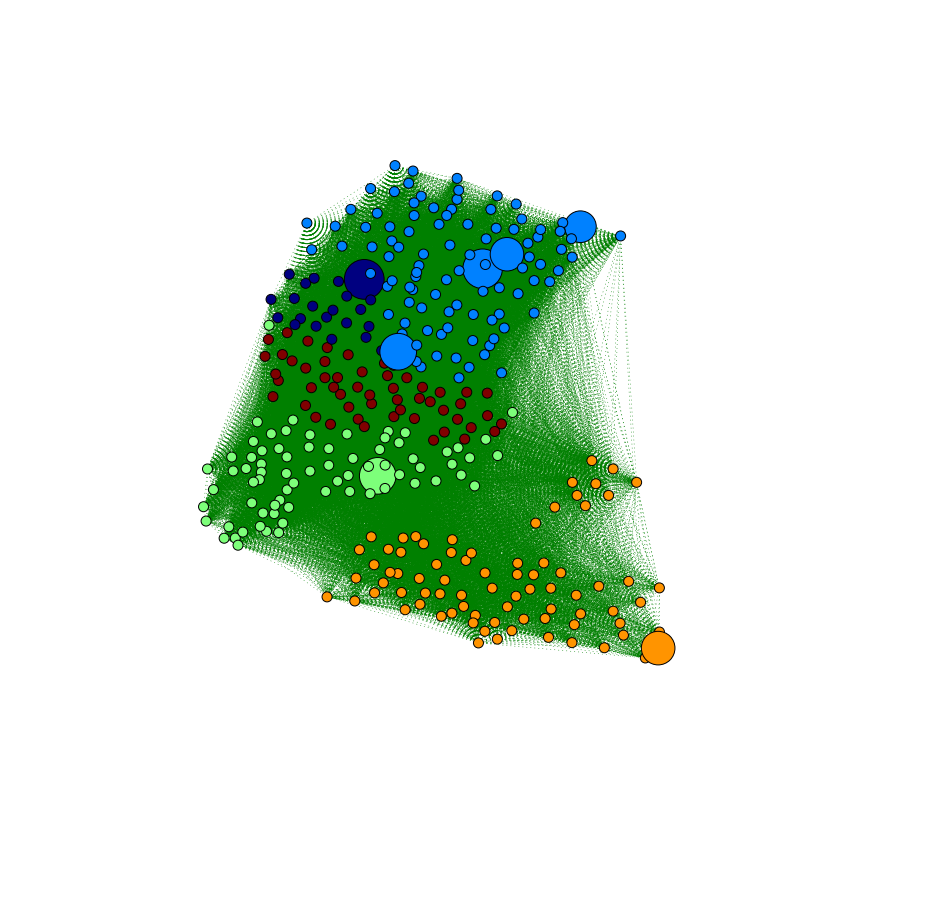

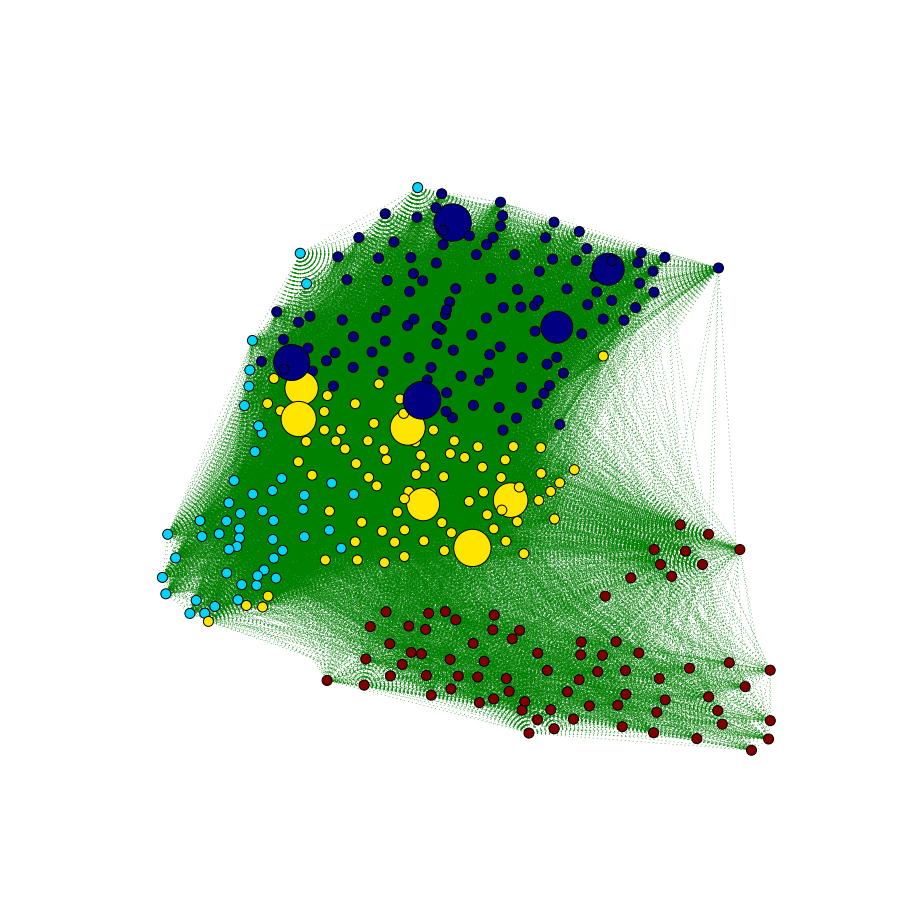

In [35]:
# Plotting the communities
random.seed(2015)
visualizePartition(maleGraph, male_communities, male_pagerank, pos)
random.seed(2015)
visualizePartition(femaleGraph, female_communities, female_pagerank, pos)

In [22]:
print unique(male_communities.values())

[0 1 2 3 4]


In [26]:
# Splitting the graphs into communities for Males
group0 = []
group1 = []
group2 = []
group3 = []
group4 = []
for k in male_communities:
    if male_communities[k] == 0:
        group0.append(k)
    if male_communities[k] == 1:
        group1.append(k)
    if male_communities[k] == 2:
        group2.append(k)
    if male_communities[k] == 3:
        group3.append(k)
    if male_communities[k] == 4:
        group4.append(k)

maleGraph0 = maleGraph.subgraph(group0)
maleGraph1 = maleGraph.subgraph(group1)
maleGraph2 = maleGraph.subgraph(group2)
maleGraph3 = maleGraph.subgraph(group3)
maleGraph4 = maleGraph.subgraph(group4)

In [24]:
# Splitting the graphs into communities for Females
group0 = []
group1 = []
group2 = []
group3 = []
for k in female_communities:
    if female_communities[k] == 0:
        group0.append(k)
    elif female_communities[k] == 1:
        group1.append(k)
    elif female_communities[k] == 2:
        group2.append(k)
    elif female_communities[k] == 3:
        group3.append(k)

femaleGraph0 = femaleGraph.subgraph(group0)
femaleGraph1 = femaleGraph.subgraph(group1)
femaleGraph2 = femaleGraph.subgraph(group2)
femaleGraph3 = femaleGraph.subgraph(group3)

In [36]:
# Calculating pageranks for each community inside each community
print "Male community 0"
topdict(nx.pagerank(maleGraph0, 0.85), 10)
print "\n"
print "Female community 0"
topdict(nx.pagerank(femaleGraph0, 0.85), 10)
print "\n\n"
print "Male community 1"
topdict(nx.pagerank(maleGraph1, 0.85), 10)
print "\n"
print "Female community 1"
topdict(nx.pagerank(femaleGraph1, 0.85), 10)
print "\n\n"
print "Male community 2"
topdict(nx.pagerank(maleGraph2, 0.85), 10)
print "\n"
print "Female community 2"
topdict(nx.pagerank(femaleGraph2, 0.85), 10)
print "\n\n"
print "Male community 3"
topdict(nx.pagerank(maleGraph3, 0.85), 10)
print "\n"
print "Female community 3"
topdict(nx.pagerank(femaleGraph3, 0.85), 10)

print "Male community 4"
topdict(nx.pagerank(maleGraph4, 0.85), 10)
print "\n"

Male community 0
1|521:0.0978601788958 8 Ave & W 31 St
2|435:0.0687750745771 W 21 St & 6 Ave
3|116:0.0557489897522 W 17 St & 8 Ave
4|462:0.0546976409004 W 22 St & 10 Ave
5|509:0.0530729271225 9 Ave & W 22 St
6|446:0.0492676269485 W 24 St & 7 Ave
7|459:0.0475626222541 W 20 St & 11 Ave
8|453:0.0465426717987 W 22 St & 8 Ave
9|494:0.0453225899587 W 26 St & 8 Ave
10|463:0.0422431248404 9 Ave & W 16 St


Female community 0
1|435:0.0216536626241 W 21 St & 6 Ave
2|497:0.0215936750099 E 17 St & Broadway
3|521:0.0176608167341 8 Ave & W 31 St
4|402:0.017239725574 Broadway & E 22 St
5|444:0.0155325217885 Broadway & W 24 St
6|499:0.0155188109036 Broadway & W 60 St
7|519:0.0150942953476 E 42 St & Vanderbilt Ave
8|462:0.0140414917227 W 22 St & 10 Ave
9|528:0.0135806743076 2 Ave & E 31 St
10|446:0.0129185713316 W 24 St & 7 Ave



Male community 1
1|519:0.0297168553216 E 42 St & Vanderbilt Ave
2|490:0.0202918726597 8 Ave & W 33 St
3|492:0.0201084832019 W 33 St & 7 Ave
4|379:0.0179346925768 W 31 St & 7 